### Step 1 - Importing Libraries

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Step - 2 Importing and Inspecting the Data

In [3]:
# Read the dataset
leads = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Data Science\\Lead Scoring Case Study\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv")

In [4]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see that the null values are present in the Datasets, Thus we have to treat them accordingly

### Step 3 Data Cleaning

In [8]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As it is clearly seen that there are columns which have high number of missing values. Hence they are not useful for us.
As we have approx. 9000 datapoints in dataset, So let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [9]:
# Droping all the columns in which have null values greater than 3000

leads.drop(['Lead Quality'], axis=1,inplace=True)
leads.drop(['Asymmetrique Profile Index'], axis=1,inplace=True)
leads.drop(['Asymmetrique Activity Index'], axis=1,inplace=True)
leads.drop(['Asymmetrique Profile Score'], axis=1,inplace=True)
leads.drop(['Asymmetrique Activity Score'], axis=1,inplace=True)
leads.drop(['Tags'], axis=1,inplace=True)

In [10]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [11]:
#checking value counts of "City" column
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Mumbai has highest numbers of leads.

It may interpret, As it is highly imbalance. So it's best that we drop it.

In [12]:
# dropping the "City" column
leads.drop(['City'], axis = 1, inplace = True)

In [13]:
#checking value counts of "Country" column
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

India has highest numbers of leads.

Same as City column, It is highly imbalance. So it's best that we drop it.

In [14]:
# dropping the "Country" feature
leads.drop(['Country'], axis = 1, inplace = True)

In [15]:
#Now checking the percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
# Again Checking the number of null values
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [17]:
# Lets check the value counts of all the columns

for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In this it clearly shows that few columns (Specialization, How did you hear about X Education, Lead Profile ) have the values as 'Select', which is of no use in our analysis. So we can drop this columns.

In [18]:
leads.drop(['Specialization'], axis=1,inplace=True)
leads.drop(['How did you hear about X Education'], axis=1,inplace=True)
leads.drop(['Lead Profile'], axis=1,inplace=True)

Also we notice that, when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points i.e. its impalde. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since, it's best that we drop these columns as they won't help with our analysis.

In [19]:
# Dropping the above columns

leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

In [20]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [21]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

It seams that the column "What is your current occupation " has large number of null values. As we have already drop lots of columns. So lets just drop the null rows of the columns

In [22]:
# Dropping the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [23]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [24]:
# Dropping the null values rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [25]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [26]:
# Dropping the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [27]:
# Checking the number of null values again
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Step - 4 Data Analyzing

Now null values are removed, So now we can check the correlation and start Analysing the Data.

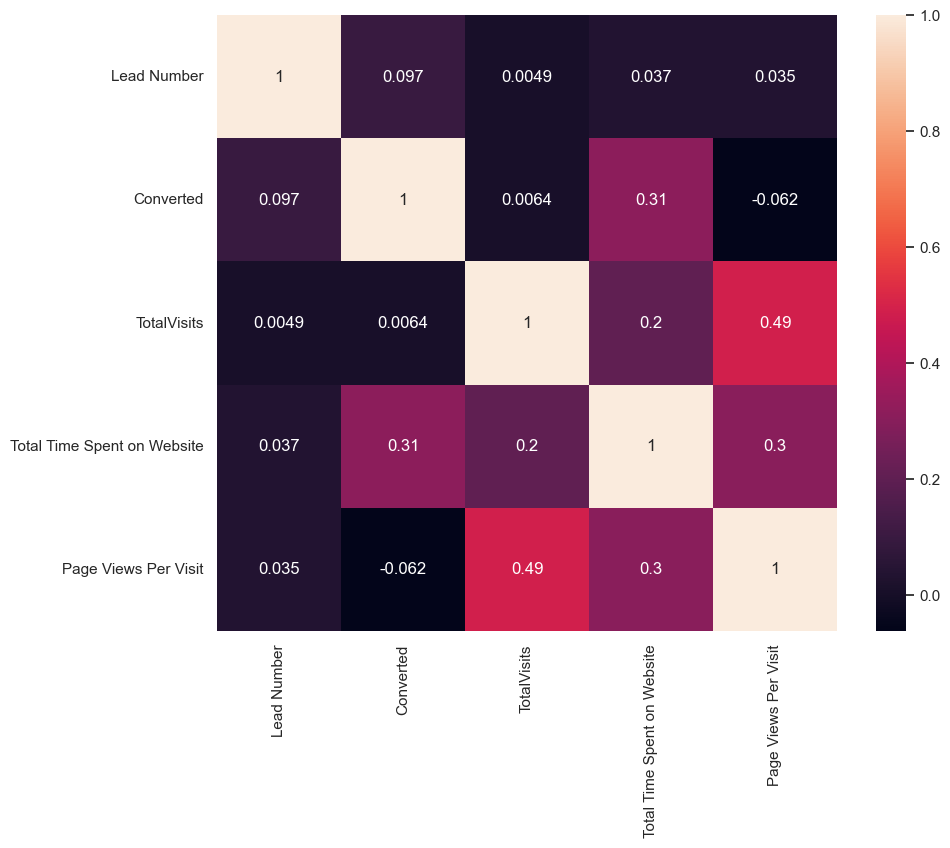

In [28]:
# Observing Correlation

plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), annot=True)
plt.show()

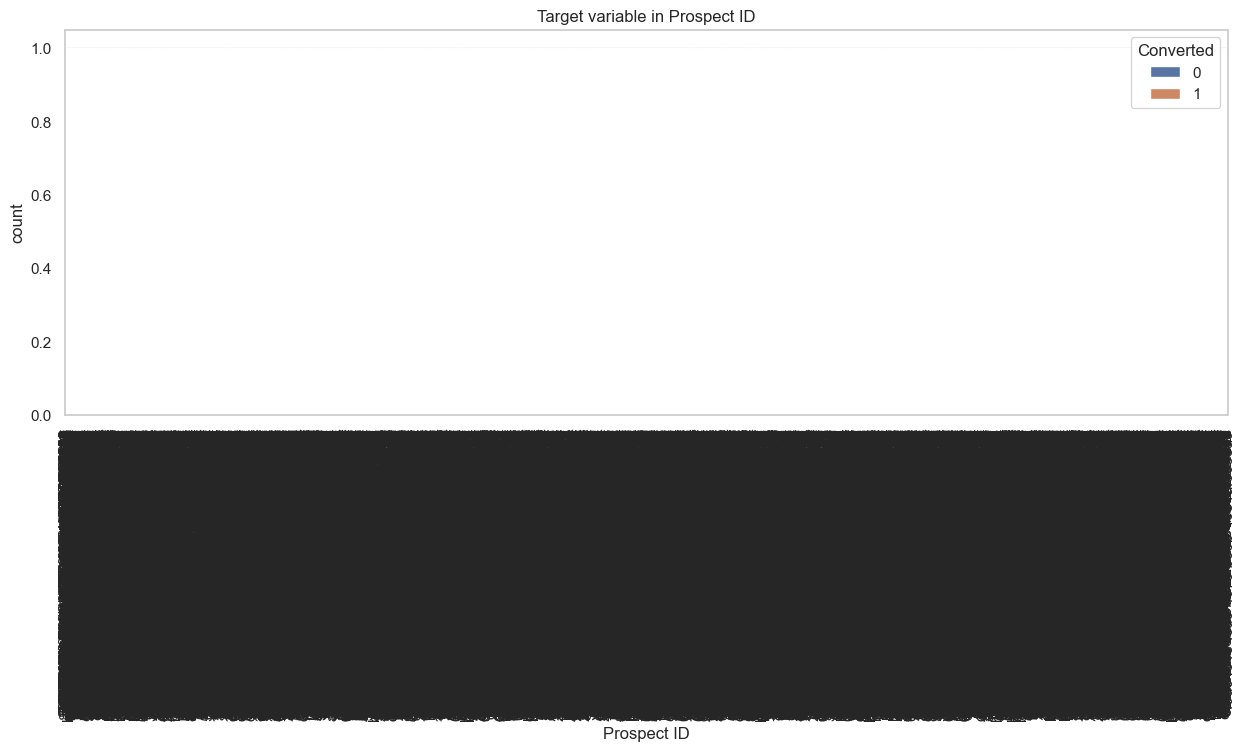

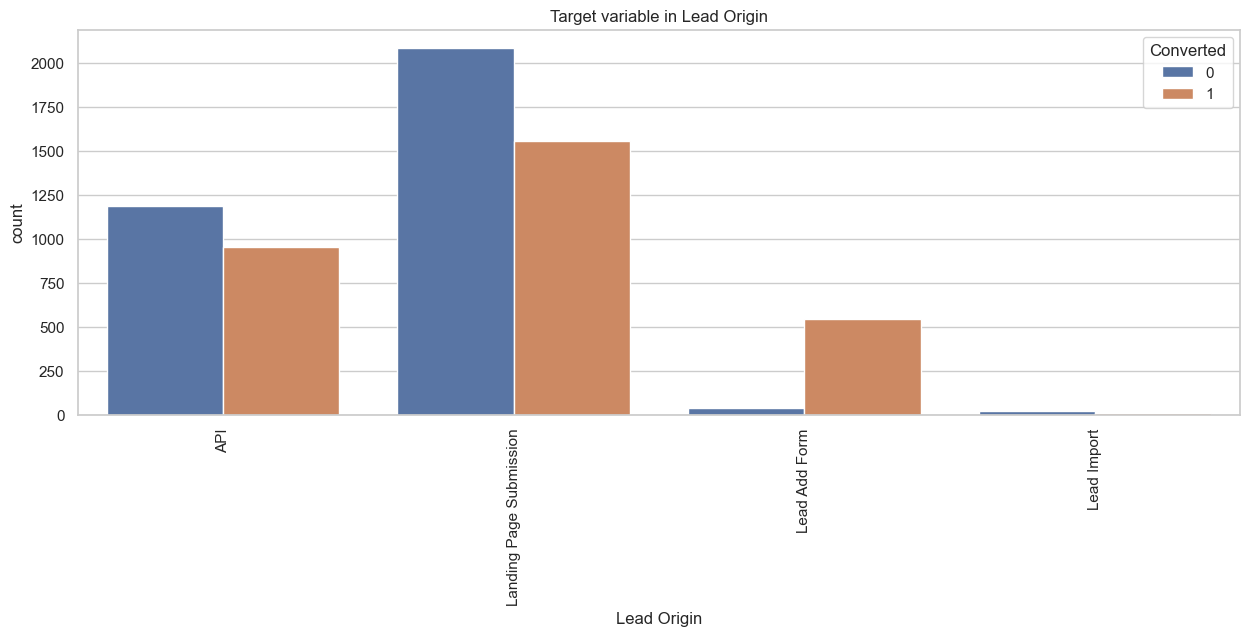

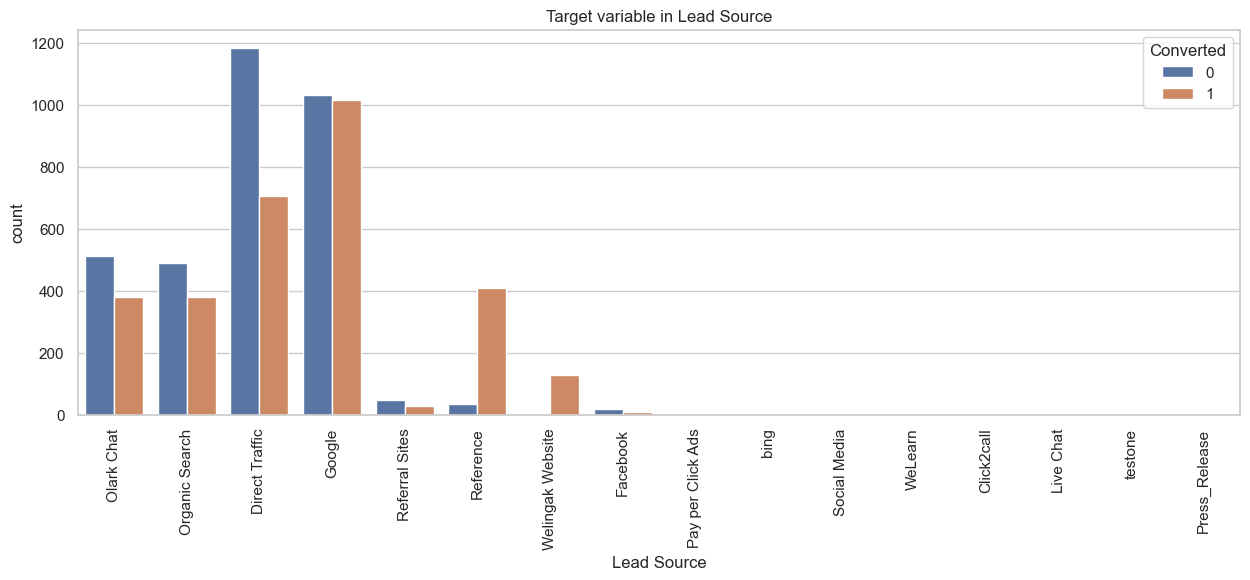

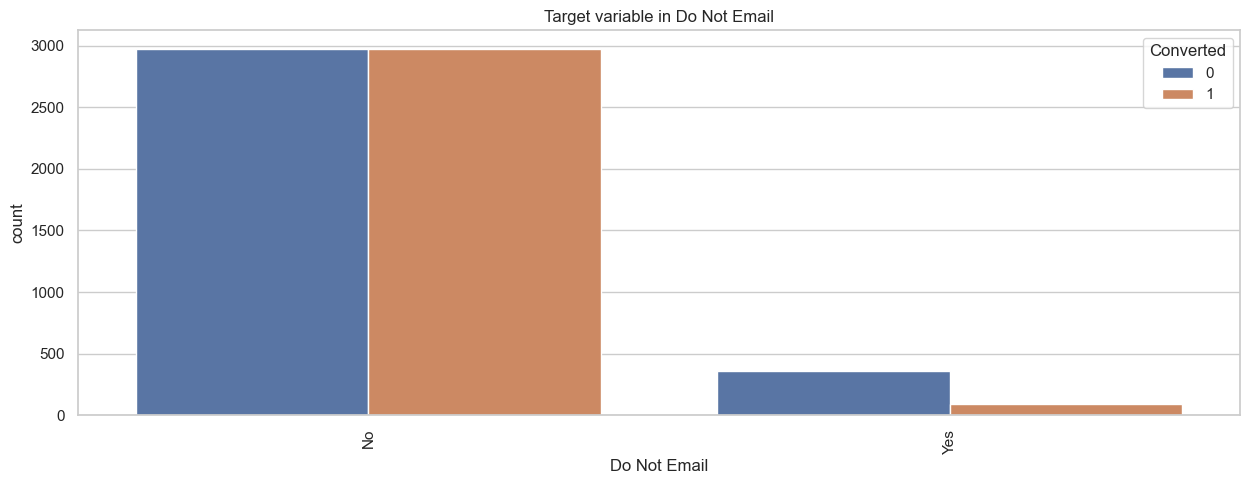

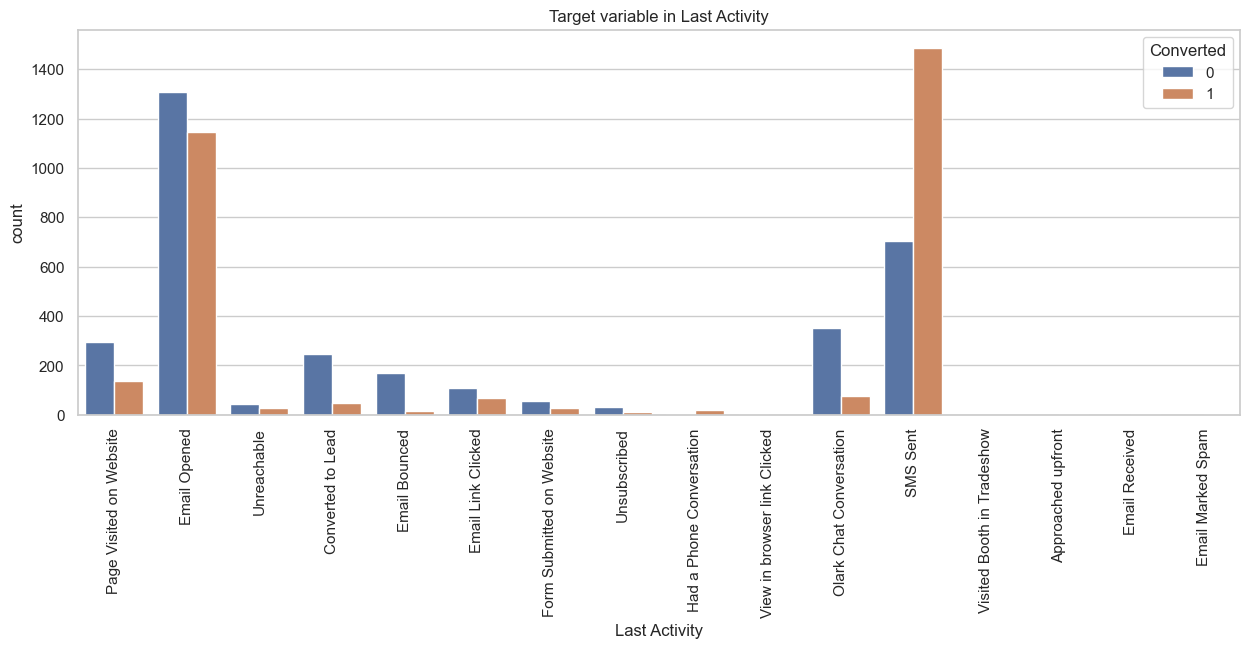

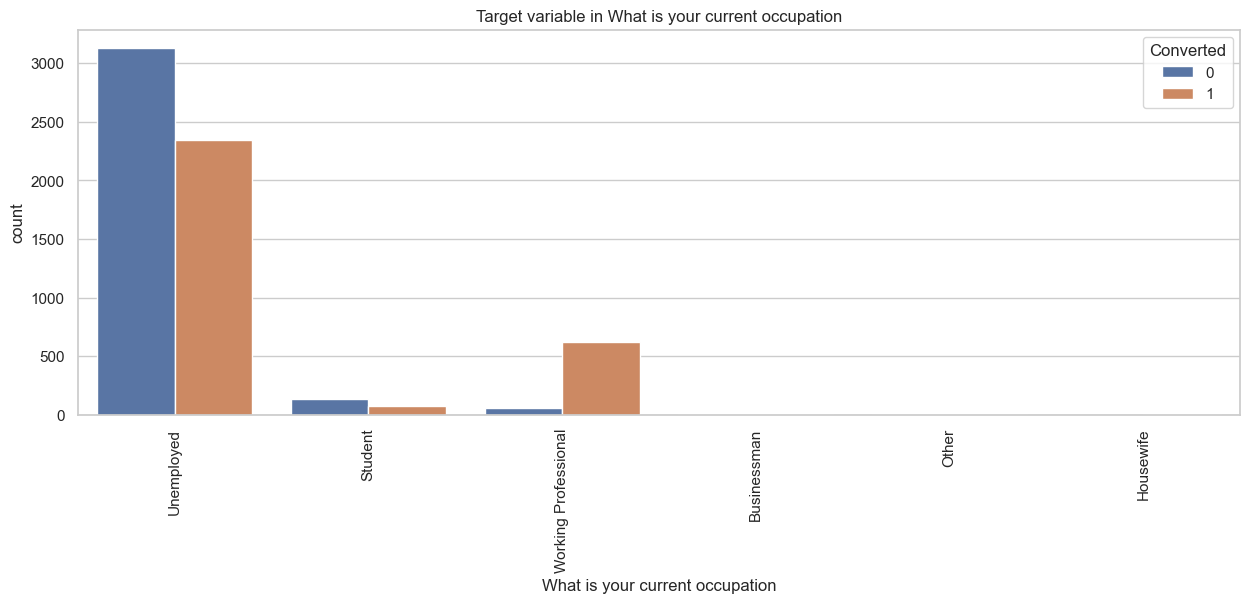

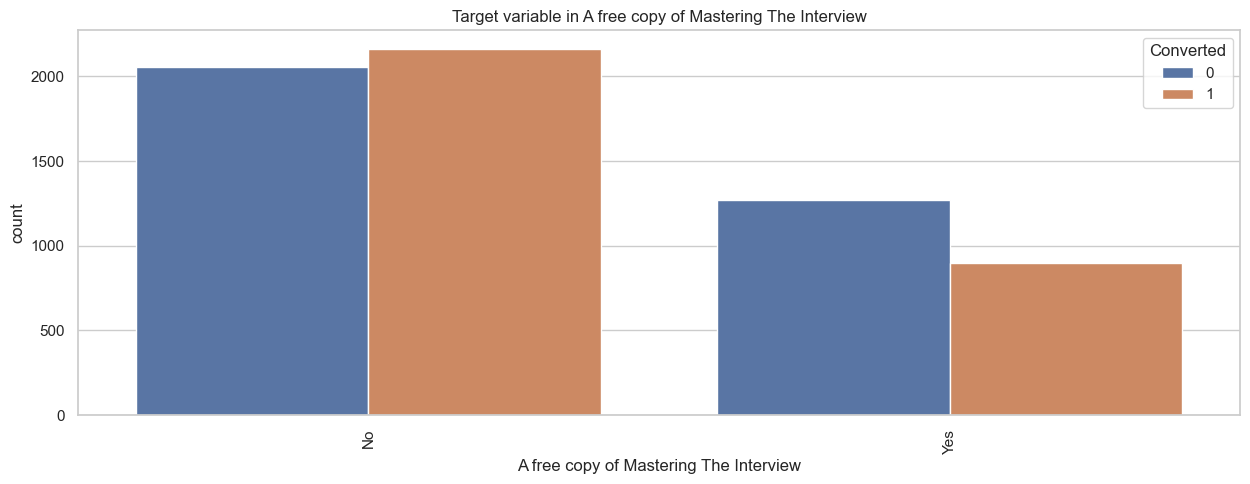

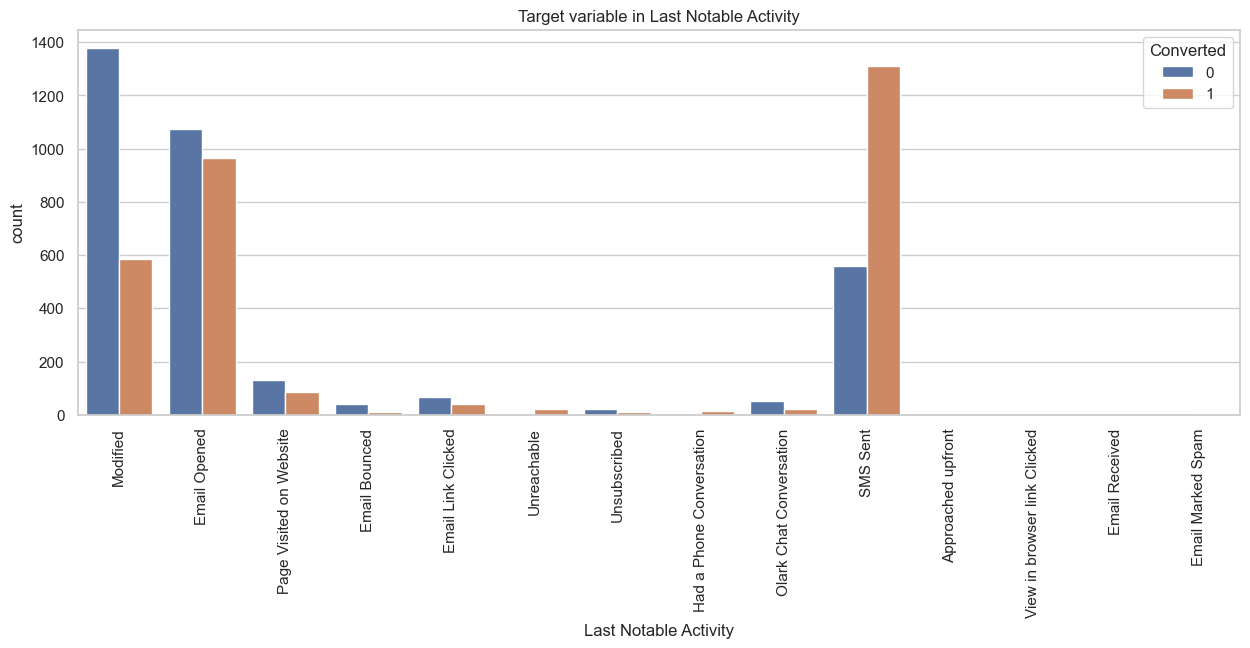

In [29]:
col  = leads.select_dtypes(include ="object").columns
for i in col:
    
    plt.figure(figsize =(15,5))
    sns.countplot(x= leads[i], hue=leads.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

In [30]:
# Let's look at the dataset again

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


"Prospect ID" and "Lead Number" is of no use in our analysis, So it can be dropped also.

In [31]:
# Dropping the "Prospect ID" and "Lead Number" 
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [32]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


### Step - 5 Data Preparation

Converting some binary variables (Yes/No) to 0/1

In [33]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [34]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [35]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6391 non-null   object 
 1   Lead Source                             6391 non-null   object 
 2   Do Not Email                            6391 non-null   int64  
 3   Converted                               6391 non-null   int64  
 4   TotalVisits                             6391 non-null   float64
 5   Total Time Spent on Website             6391 non-null   int64  
 6   Page Views Per Visit                    6391 non-null   float64
 7   Last Activity                           6391 non-null   object 
 8   What is your current occupation         6391 non-null   object 
 9   A free copy of Mastering The Interview  6391 non-null   int64  
 10  Last Notable Activity                   6391 non-null   obje

#### Dummy Variable Creation

In [36]:
#list of categorical columns foy creating dummy

catcol= leads.select_dtypes(include=['object']).columns
catcol

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [37]:
#getting dummies and dropping the first column and adding the results back to the master dataframe

# Lead origin
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)

#Lead Source
dummy = pd.get_dummies(leads[['Lead Source']], drop_first=True)
leads = pd.concat([leads,dummy],1)

#Last Activity
dummy = pd.get_dummies(leads[['Last Activity']], drop_first=True)
leads = pd.concat([leads,dummy],1)

#What is your current occupation
dummy = pd.get_dummies(leads[['What is your current occupation']], drop_first=True)
leads = pd.concat([leads,dummy],1)

#Last Notable Activity
dummy = pd.get_dummies(leads[['Last Notable Activity']], drop_first=True)
leads = pd.concat([leads,dummy],1)

In [38]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,...,0,0,0,1,0,0,0,0,0,0


Now dropping the original columns in dataset

In [39]:
leads.drop(catcol,1,inplace = True)

In [40]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Test - Train Split

In [41]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
#lets check the shape

X_train.shape

(4473, 56)

In [45]:
y_train.shape

(4473,)

In [46]:
X_test.shape

(1918, 56)

In [47]:
y_test.shape

(1918,)

#### Feature Scaling

In [48]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
533,-0.269081,-0.120283,0.524169,0.267996,1.394525,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
846,-0.269081,-0.688818,-0.941997,-1.197183,-0.717090,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7546,-0.269081,1.016788,0.554235,3.198354,1.394525,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8631,-0.269081,0.258741,0.655045,1.244782,-0.717090,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7824,-0.269081,-0.499306,-0.613038,-0.708790,-0.717090,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
## Checking conversion rate for 'converted' column as it is the target variable

(sum(y)/len(y.index))*100

47.958066030355184

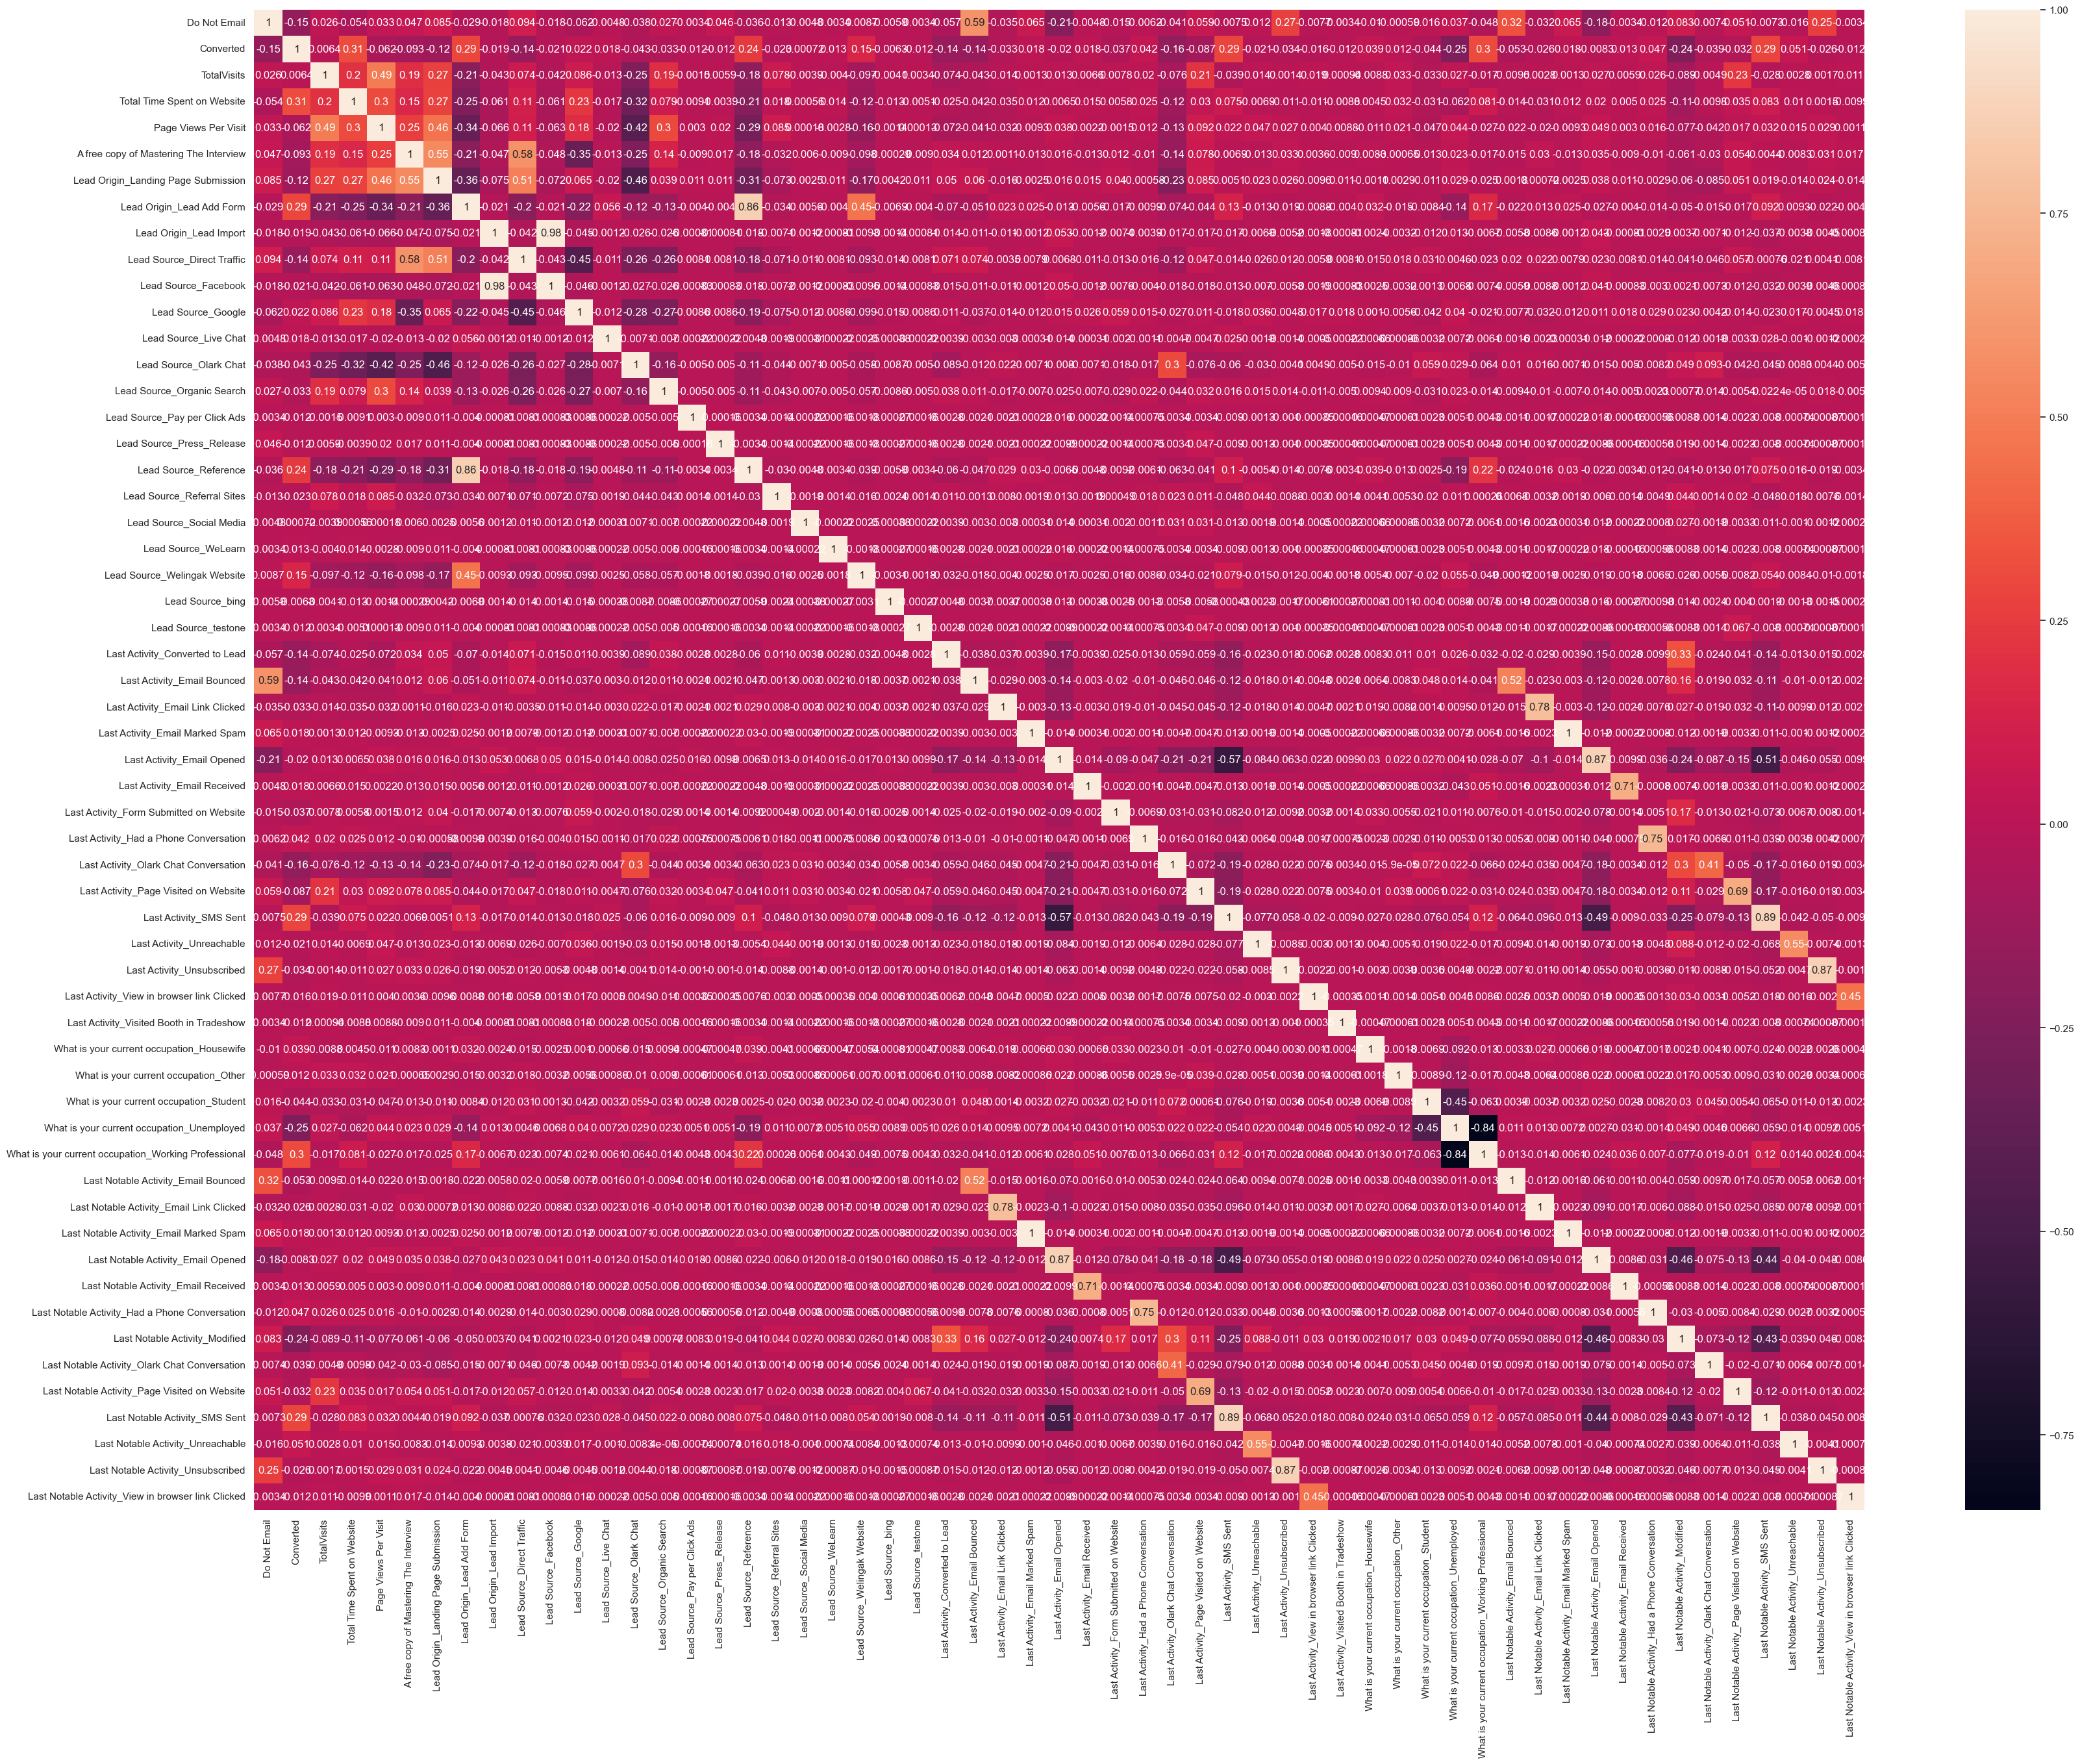

In [50]:
# Let's see the correlation matrix  
plt.figure(figsize = (40,30))
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Step - 6 Model Building

In [51]:
logreg = LogisticRegression()

In [52]:
rfe = RFE(estimator=LogisticRegression(),n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [53]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 17),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_WeLearn', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 30),
 ('Lead Source_testone', False, 40),
 ('Last Activity_Converted to Lead', False, 4),
 ('Last Activity_Emai

In [54]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [55]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [56]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [57]:
X_train.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_View in browser link Clicked,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
533,0.524169,0,0,0,0,0,0,0,0,0,0,0,1,0,0
846,-0.941997,1,0,1,0,0,0,0,0,0,0,1,0,0,0
7546,0.554235,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8631,0.655045,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7824,-0.613038,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### MODEL - 1

In [58]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4457
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.5
Date:                Mon, 18 Sep 2023   Deviance:                       4192.9
Time:                        23:22:58   Pearson chi2:                 4.71e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3601
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1949      0.542     -0.360      0.719      -1.257       0.867
Total Time Spent on Website                              1.1392      0.046     24.803      0.000       1.049       1.229
Lead Origin_Lead Add Form                                3.2364      1.129      2.867      0.004       1.024       5.449
Lead Source_Olark Chat                                   1.4967      0.118     12.732      0.000       1.266       1.727
Lead Source_Reference                                    0.5559      1.151      0.483      0.629      -1.700       2.811
Lead Source_Welingak Website                             2.2317      1.340      1.666      0.096      -0.394       4.858
Last Activity_Email Bounced                             -2.0515      0.383     -5.357      0.000      -2.802      -1.301
Last Activity_Had a Phone Conversation                   0.7743      0.855      0.906      0.365      -0.902       2.450
Last Activity_Olark Chat Conversation                   -1.1276      0.181     -6.246      0.000      -1.481      -0.774
Last Activity_SMS Sent                                   1.0225      0.083     12.393      0.000       0.861       1.184
Last Activity_View in browser link Clicked             -21.9016   2.21e+04     -0.001      0.999   -4.33e+04    4.32e+04
What is your current occupation_Student                 -0.8683      0.580     -1.498      0.134      -2.004       0.268
What is your current occupation_Unemployed              -0.8715      0.543     -1.605      0.109      -1.936       0.193
What is your current occupation_Working Professional     1.6054      0.570      2.816      0.005       0.488       2.723
Last Notable Activity_Had a Phone Conversation          22.5740   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
Last Notable Activity_Unreachable                        3.4965      1.072      3.261      0.001       1.395       5.598
========================================================================================================================
"""

In [59]:
#'Last Activity_View in browser link Clicked" has very high P-Value, Hence we drop this column

col = col.drop('Last Activity_View in browser link Clicked',1)

#### MODEL - 2

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4458
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2098.1
Date:                Mon, 18 Sep 2023   Deviance:                       4196.3
Time:                        23:22:58   Pearson chi2:                 4.71e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3596
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1962      0.542     -0.362      0.717      -1.259       0.866
Total Time Spent on Website                              1.1411      0.046     24.844      0.000       1.051       1.231
Lead Origin_Lead Add Form                                3.2397      1.129      2.870      0.004       1.027       5.452
Lead Source_Olark Chat                                   1.4968      0.117     12.741      0.000       1.267       1.727
Lead Source_Reference                                    0.5566      1.151      0.484      0.629      -1.699       2.812
Lead Source_Welingak Website                             2.2311      1.340      1.665      0.096      -0.395       4.857
Last Activity_Email Bounced                             -2.0468      0.383     -5.348      0.000      -2.797      -1.297
Last Activity_Had a Phone Conversation                   0.7773      0.855      0.909      0.363      -0.898       2.453
Last Activity_Olark Chat Conversation                   -1.1240      0.180     -6.228      0.000      -1.478      -0.770
Last Activity_SMS Sent                                   1.0257      0.082     12.433      0.000       0.864       1.187
What is your current occupation_Student                 -0.8681      0.580     -1.497      0.134      -2.005       0.268
What is your current occupation_Unemployed              -0.8727      0.543     -1.606      0.108      -1.937       0.192
What is your current occupation_Working Professional     1.5864      0.570      2.784      0.005       0.470       2.703
Last Notable Activity_Had a Phone Conversation          22.5745   1.36e+04      0.002      0.999   -2.66e+04    2.66e+04
Last Notable Activity_Unreachable                        3.5000      1.072      3.264      0.001       1.398       5.602
========================================================================================================================
"""

In [61]:
#'Last Notable Activity_Had a Phone Conversation" has very high P-Value, Hence we drop this column

col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

#### MODEL - 3

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4459
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.7
Date:                Mon, 18 Sep 2023   Deviance:                       4203.5
Time:                        23:22:58   Pearson chi2:                 4.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3585
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1948      0.542     -0.359      0.719      -1.257       0.867
Total Time Spent on Website                              1.1386      0.046     24.817      0.000       1.049       1.229
Lead Origin_Lead Add Form                                3.2367      1.129      2.867      0.004       1.024       5.449
Lead Source_Olark Chat                                   1.4938      0.117     12.722      0.000       1.264       1.724
Lead Source_Reference                                    0.5533      1.151      0.481      0.631      -1.702       2.809
Lead Source_Welingak Website                             2.2309      1.340      1.665      0.096      -0.395       4.857
Last Activity_Email Bounced                             -2.0460      0.383     -5.348      0.000      -2.796      -1.296
Last Activity_Had a Phone Conversation                   2.2510      0.706      3.190      0.001       0.868       3.634
Last Activity_Olark Chat Conversation                   -1.1237      0.180     -6.228      0.000      -1.477      -0.770
Last Activity_SMS Sent                                   1.0252      0.082     12.434      0.000       0.864       1.187
What is your current occupation_Student                 -0.8685      0.580     -1.498      0.134      -2.004       0.268
What is your current occupation_Unemployed              -0.8731      0.543     -1.608      0.108      -1.937       0.191
What is your current occupation_Working Professional     1.5836      0.570      2.780      0.005       0.467       2.700
Last Notable Activity_Unreachable                        3.4982      1.072      3.262      0.001       1.397       5.600
========================================================================================================================
"""

In [63]:
#'Lead Source_Reference" has very high P-Value, Hence we drop this column

col = col.drop('Lead Source_Reference',1)

#### MODEL - 4

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4460
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.9
Date:                Mon, 18 Sep 2023   Deviance:                       4203.7
Time:                        23:22:58   Pearson chi2:                 4.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3585
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1940      0.542     -0.358      0.720      -1.256       0.868
Total Time Spent on Website                              1.1386      0.046     24.816      0.000       1.049       1.229
Lead Origin_Lead Add Form                                3.7706      0.239     15.752      0.000       3.301       4.240
Lead Source_Olark Chat                                   1.4938      0.117     12.722      0.000       1.264       1.724
Lead Source_Welingak Website                             1.6970      0.760      2.232      0.026       0.207       3.187
Last Activity_Email Bounced                             -2.0460      0.383     -5.348      0.000      -2.796      -1.296
Last Activity_Had a Phone Conversation                   2.2514      0.706      3.190      0.001       0.868       3.634
Last Activity_Olark Chat Conversation                   -1.1235      0.180     -6.227      0.000      -1.477      -0.770
Last Activity_SMS Sent                                   1.0254      0.082     12.437      0.000       0.864       1.187
What is your current occupation_Student                 -0.8685      0.579     -1.499      0.134      -2.004       0.267
What is your current occupation_Unemployed              -0.8740      0.543     -1.610      0.107      -1.938       0.190
What is your current occupation_Working Professional     1.5834      0.569      2.781      0.005       0.467       2.699
Last Notable Activity_Unreachable                        3.4986      1.072      3.263      0.001       1.397       5.600
========================================================================================================================
"""

In [65]:
#'What is your current occupation_Student" has very high P-Value, Hence we drop this column

col = col.drop('What is your current occupation_Student',1)

#### MODEL - 5

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4461
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2103.0
Date:                Mon, 18 Sep 2023   Deviance:                       4206.0
Time:                        23:22:59   Pearson chi2:                 4.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3582
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9464      0.196     -4.835      0.000      -1.330      -0.563
Total Time Spent on Website                              1.1403      0.046     24.860      0.000       1.050       1.230
Lead Origin_Lead Add Form                                3.7733      0.239     15.767      0.000       3.304       4.242
Lead Source_Olark Chat                                   1.4905      0.117     12.701      0.000       1.261       1.721
Lead Source_Welingak Website                             1.6956      0.761      2.229      0.026       0.205       3.186
Last Activity_Email Bounced                             -2.0561      0.382     -5.378      0.000      -2.805      -1.307
Last Activity_Had a Phone Conversation                   2.2504      0.706      3.189      0.001       0.867       3.634
Last Activity_Olark Chat Conversation                   -1.1238      0.180     -6.231      0.000      -1.477      -0.770
Last Activity_SMS Sent                                   1.0232      0.082     12.409      0.000       0.862       1.185
What is your current occupation_Unemployed              -0.1203      0.196     -0.612      0.540      -0.505       0.265
What is your current occupation_Working Professional     2.3374      0.261      8.957      0.000       1.826       2.849
Last Notable Activity_Unreachable                        3.5038      1.072      3.270      0.001       1.404       5.604
========================================================================================================================
"""

In [67]:
#'What is your current occupation_Unemployed" has very high P-Value, Hence we drop this column

col = col.drop('What is your current occupation_Unemployed',1)

#### MODEL - 6

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4462
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2103.2
Date:                Mon, 18 Sep 2023   Deviance:                       4206.4
Time:                        23:22:59   Pearson chi2:                 4.71e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3581
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0614      0.056    -18.970      0.000      -1.171      -0.952
Total Time Spent on Website                              1.1409      0.046     24.878      0.000       1.051       1.231
Lead Origin_Lead Add Form                                3.7775      0.239     15.788      0.000       3.309       4.246
Lead Source_Olark Chat                                   1.4938      0.117     12.739      0.000       1.264       1.724
Lead Source_Welingak Website                             1.6884      0.760      2.220      0.026       0.198       3.179
Last Activity_Email Bounced                             -2.0522      0.382     -5.366      0.000      -2.802      -1.303
Last Activity_Had a Phone Conversation                   2.2453      0.706      3.182      0.001       0.862       3.629
Last Activity_Olark Chat Conversation                   -1.1195      0.180     -6.213      0.000      -1.473      -0.766
Last Activity_SMS Sent                                   1.0195      0.082     12.400      0.000       0.858       1.181
What is your current occupation_Working Professional     2.4526      0.181     13.551      0.000       2.098       2.807
Last Notable Activity_Unreachable                        3.4999      1.071      3.267      0.001       1.400       5.600
========================================================================================================================
"""

In [69]:
#'Lead Source_Welingak Website" has very high P-Value, Hence we drop this column

col = col.drop('Lead Source_Welingak Website',1)

#### MODEL - 7

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4473
Model:                            GLM   Df Residuals:                     4463
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2106.9
Date:                Mon, 18 Sep 2023   Deviance:                       4213.8
Time:                        23:22:59   Pearson chi2:                 4.70e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3571
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0627      0.056    -18.991      0.000      -1.172      -0.953
Total Time Spent on Website                              1.1406      0.046     24.875      0.000       1.051       1.230
Lead Origin_Lead Add Form                                4.0792      0.227     17.949      0.000       3.634       4.525
Lead Source_Olark Chat                                   1.4936      0.117     12.738      0.000       1.264       1.723
Last Activity_Email Bounced                             -2.0061      0.375     -5.351      0.000      -2.741      -1.271
Last Activity_Had a Phone Conversation                   2.2442      0.706      3.178      0.001       0.860       3.628
Last Activity_Olark Chat Conversation                   -1.1199      0.180     -6.211      0.000      -1.473      -0.766
Last Activity_SMS Sent                                   1.0233      0.082     12.457      0.000       0.862       1.184
What is your current occupation_Working Professional     2.4429      0.181     13.486      0.000       2.088       2.798
Last Notable Activity_Unreachable                        3.4975      1.072      3.263      0.001       1.397       5.598
========================================================================================================================
"""

Model 7 Seams to be stable with significant p-values.

Calculating VIF

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.35
1,Lead Origin_Lead Add Form,1.25
0,Total Time Spent on Website,1.24
6,Last Activity_SMS Sent,1.22
5,Last Activity_Olark Chat Conversation,1.16
7,What is your current occupation_Working Profes...,1.15
3,Last Activity_Email Bounced,1.00
4,Last Activity_Had a Phone Conversation,1.00
8,Last Notable Activity_Unreachable,1.00


All variables have a good VIF. So that our Model 7 is stable and we don't need to drop any further columns.

#### Predicting a Train Model

In [72]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

533     0.878479
846     0.874585
7546    0.644013
8631    0.669917
7824    0.146553
          ...   
8738    0.385368
100     0.760798
5858    0.540049
8630    0.179487
8192    0.194143
Length: 4473, dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)

In [74]:
y_train_pred

array([0.8784786 , 0.87458517, 0.64401336, ..., 0.54004919, 0.1794872 ,
       0.19414291])

In [75]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.878479,533
1,1,0.874585,846
2,1,0.644013,7546
3,0,0.669917,8631
4,0,0.146553,7824


In [76]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.878479,533,1
1,1,0.874585,846,1
2,1,0.644013,7546,1
3,0,0.669917,8631,1
4,0,0.146553,7824,0


### Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1949  400]
 [ 565 1559]]


In [78]:
# Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7842611222892913


In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7339924670433146

In [81]:
# Specificity
TN / float(TN+FP)

0.8297147722435079

In [82]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.17028522775649213


In [83]:
# positive predictive value 
print (TP / float(TP+FP))

0.7958141909137315


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7752585521081942


### PLOTTING ROC CURVE

In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

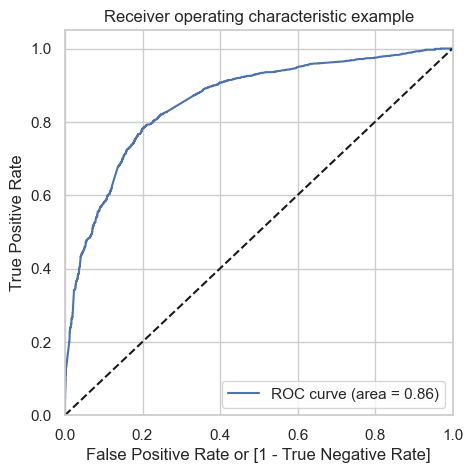

In [86]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be close to 1. And we get value of 0.86 it indicates a good predictive model.

#### Finding Optimal Cutoff Point

Optimal cutoff probability is probability where we get balanced sensitivity and specificity

In [87]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.878479,533,1,1,1,1,1,1,1,1,1,1,0
1,1,0.874585,846,1,1,1,1,1,1,1,1,1,1,0
2,1,0.644013,7546,1,1,1,1,1,1,1,1,0,0,0
3,0,0.669917,8631,1,1,1,1,1,1,1,1,0,0,0
4,0,0.146553,7824,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,0,0.385368,8738,0,1,1,1,1,0,0,0,0,0,0
4469,0,0.760798,100,1,1,1,1,1,1,1,1,1,0,0
4470,1,0.540049,5858,1,1,1,1,1,1,1,0,0,0,0
4471,0,0.179487,8630,0,1,1,0,0,0,0,0,0,0,0


In [88]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.474849  1.000000  0.000000
0.1   0.1  0.510396  0.995292  0.071946
0.2   0.2  0.705120  0.931262  0.500639
0.3   0.3  0.754080  0.896422  0.625372
0.4   0.4  0.786497  0.793785  0.779906
0.5   0.5  0.784261  0.733992  0.829715
0.6   0.6  0.757210  0.622411  0.879097
0.7   0.7  0.739772  0.542373  0.918263
0.8   0.8  0.709814  0.434557  0.958706
0.9   0.9  0.636486  0.252825  0.983397


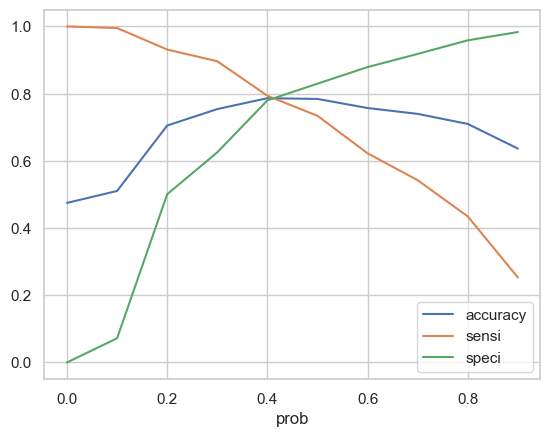

In [89]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [90]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.878479,533,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.874585,846,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.644013,7546,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.669917,8631,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.146553,7824,0,1,1,0,0,0,0,0,0,0,0,0


In [91]:
# Assigning the Lead Score based

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']]

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.878479,533,1,88
1,1,0.874585,846,1,87
2,1,0.644013,7546,1,64
3,0,0.669917,8631,1,67
4,0,0.146553,7824,0,15
...,...,...,...,...,...
4468,0,0.385368,8738,0,39
4469,0,0.760798,100,1,76
4470,1,0.540049,5858,1,54
4471,0,0.179487,8630,0,18


In [92]:
# checking the percentage of correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1686
0     438
Name: final_Predicted, dtype: int64

In [93]:
1686 / float(1686+438)

0.7937853107344632

It is almost 80% of correctly predicted based on converted column 

### Hence, we can see that the final prediction of conversions have a target of almost 80% conversion as per the X Educations CEO's requirement . Hence, it is a good model.

#### Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [94]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1832,  517],
       [ 438, 1686]], dtype=int64)

In [95]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7864967583277442

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7937853107344632

In [98]:
# Specificity
TN / float(TN+FP)

0.779906343124734

In [99]:
# Calculate False Postive Rate -
print(FP/ float(TN+FP))

0.22009365687526608


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7653200181570585


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8070484581497798


In [102]:
## Precision
TP / float(TP+FP)

0.7653200181570585

In [103]:
## Recall
TP / float(TP+FN)

0.7937853107344632

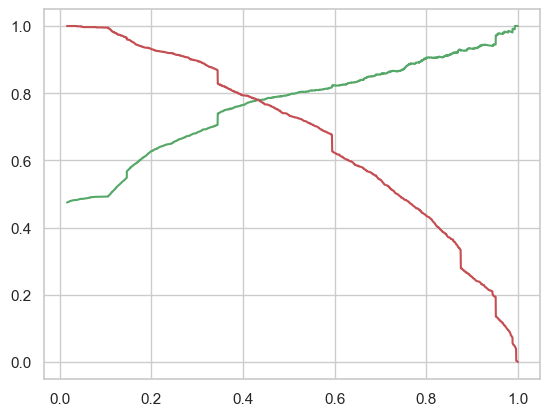

In [104]:
# Creating precision recall curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From this also it clearly seen that it will cross around 0.4. Hence our model is Stable.

## Predictions on the test set

In [105]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2938,-0.284908,0.093059,0.998731,0.604331,-0.717641,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4301,3.509907,-0.581328,-0.376881,-0.637334,1.393455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5904,3.509907,-0.131736,-0.256338,0.190443,1.393455,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6881,3.509907,1.217038,-0.680012,0.811275,-0.717641,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5195,-0.284908,0.093059,1.342634,0.604331,-0.717641,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
X_test = X_test[col]
X_test

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
2938,0.998731,0,0,0,0,0,1,1,0
4301,-0.376881,0,1,0,0,0,0,0,0
5904,-0.256338,0,0,0,0,0,0,0,0
6881,-0.680012,0,0,1,0,0,0,0,0
5195,1.342634,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
5413,0.761190,0,0,0,0,0,0,0,0
7454,-0.958325,0,1,0,0,0,0,0,0
8201,1.285908,0,0,0,0,0,0,0,0
7979,0.858688,0,0,0,0,0,1,0,0


In [107]:
X_test_sm = sm.add_constant(X_test)

In [108]:
X_test_sm.shape

(1918, 10)

In [109]:
y_test_pred = res.predict(X_test_sm)

In [110]:
y_test_pred

2938    0.971879
4301    0.500263
5904    0.205047
6881    0.020951
5195    0.816389
          ...   
5413    0.451537
7454    0.340259
8201    0.599655
7979    0.719116
3643    0.765798
Length: 1918, dtype: float64

In [111]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [112]:
y_pred_1

,0
2938,0.971879
4301,0.500263
5904,0.205047
6881,0.020951
5195,0.816389
...,...
5413,0.451537
7454,0.340259
8201,0.599655
7979,0.719116


In [113]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [114]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [115]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [116]:
y_pred_final

,Converted,Prospect ID,0
0,1,2938,0.971879
1,0,4301,0.500263
2,0,5904,0.205047
3,0,6881,0.020951
4,1,5195,0.816389
...,...,...,...
1913,1,5413,0.451537
1914,1,7454,0.340259
1915,0,8201,0.599655
1916,1,7979,0.719116


In [117]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final

,Converted,Prospect ID,Converted_prob
0,1,2938,0.971879
1,0,4301,0.500263
2,0,5904,0.205047
3,0,6881,0.020951
4,1,5195,0.816389
...,...,...,...
1913,1,5413,0.451537
1914,1,7454,0.340259
1915,0,8201,0.599655
1916,1,7979,0.719116


Assigning Lead Score

In [118]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final

,Prospect ID,Converted,Converted_prob,Lead_Score
0,2938,1,0.971879,97
1,4301,0,0.500263,50
2,5904,0,0.205047,21
3,6881,0,0.020951,2
4,5195,1,0.816389,82
...,...,...,...,...
1913,5413,1,0.451537,45
1914,7454,1,0.340259,34
1915,8201,0,0.599655,60
1916,7979,1,0.719116,72


In [119]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2938,1,0.971879,97,1
1,4301,0,0.500263,50,1
2,5904,0,0.205047,21,0
3,6881,0,0.020951,2,0
4,5195,1,0.816389,82,1
...,...,...,...,...,...
1913,5413,1,0.451537,45,1
1914,7454,1,0.340259,34,0
1915,8201,0,0.599655,60,1
1916,7979,1,0.719116,72,1


In [120]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    747
0    194
Name: final_Predicted, dtype: int64

In [121]:
747 / float(747+194)

0.793836344314559

### Hence we can see that the final prediction of conversions have a target rate of 80% (same as predictions made on training data set)

#### Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [122]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion4

array([[766, 211],
       [194, 747]], dtype=int64)

In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7888425443169969

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7937853107344632

In [126]:
# Specificity
TN / float(TN+FP)

0.779906343124734

In [127]:
# Calculate False Postive Rate -
print(FP/ float(TN+FP))

0.22009365687526608


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7653200181570585


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8070484581497798


Precision and Recall Vlues

In [130]:
## Precision
TP / float(TP+FP)

0.7653200181570585

In [131]:
## Recall
TP / float(TP+FN)

0.7937853107344632

## Conclusion:

1. Accuracy, Sensitivity and Specificity values of test set are around 78%, 79% and 77% which are approximately closer to the respective values calculated using trained set.
2. While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
3. Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%.

This results that this model seems to be good. 